testing


In [ ]:
# testing2

In [8]:
from sktime.classification.kernel_based import RocketClassifier
from sktime.datasets import load_unit_test
X_train, y_train = load_unit_test(split="train", return_X_y=True)
X_test, y_test = load_unit_test(split="test", return_X_y=True) 
clf = RocketClassifier(num_kernels=500) 
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test) 

In [9]:
from sklearn import metrics

from aeon.datasets import load_italy_power_demand
from aeon.utils.discovery import all_estimators

all_estimators("classifier", tag_filter={"algorithm_type": "distance"})

[('ElasticEnsemble',
  aeon.classification.distance_based._elastic_ensemble.ElasticEnsemble),
 ('KNeighborsTimeSeriesClassifier',
  aeon.classification.distance_based._time_series_neighbors.KNeighborsTimeSeriesClassifier),
 ('ProximityForest',
  aeon.classification.distance_based._proximity_forest.ProximityForest),
 ('ProximityTree',
  aeon.classification.distance_based._proximity_tree.ProximityTree)]

In [10]:
X_train, y_train = load_italy_power_demand(split="train")
X_test, y_test = load_italy_power_demand(split="test")
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(67, 1, 24) (67,) (1029, 1, 24) (1029,)


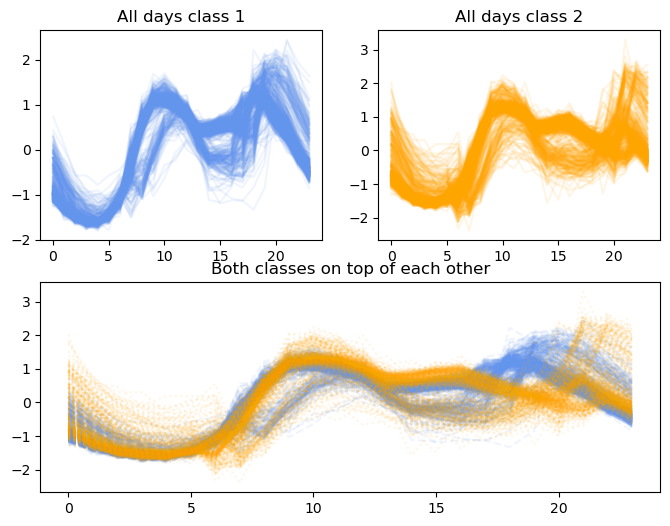

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(8, 6))
axs[1, 1].axis("off")
axs[1, 0].axis("off")
ax_combined = fig.add_subplot(2, 1, (2, 3))
axs[0, 0].set_title("All days class 1")
axs[0, 1].set_title("All days class 2")
ax_combined.set_title("Both classes on top of each other")
for i in np.where(y_test == "1")[0]:
    axs[0, 0].plot(X_test[i][0], alpha=0.1, color="cornflowerblue", linestyle="solid")
    ax_combined.plot(X_test[i][0], alpha=0.1, color="cornflowerblue", linestyle="--")
for i in np.where(y_test == "2")[0]:
    axs[0, 1].plot(X_test[i][0], alpha=0.1, color="orange", linestyle="solid")
    ax_combined.plot(X_test[i][0], alpha=0.1, color="orange", linestyle=":")

In [12]:
import warnings

from aeon.utils.discovery import all_estimators

warnings.filterwarnings("ignore")
all_estimators("classifier", tag_filter={"algorithm_type": "convolution"})

[('Arsenal', aeon.classification.convolution_based._arsenal.Arsenal),
 ('HydraClassifier',
  aeon.classification.convolution_based._hydra.HydraClassifier),
 ('MiniRocketClassifier',
  aeon.classification.convolution_based._minirocket.MiniRocketClassifier),
 ('MultiRocketClassifier',
  aeon.classification.convolution_based._multirocket.MultiRocketClassifier),
 ('MultiRocketHydraClassifier',
  aeon.classification.convolution_based._mr_hydra.MultiRocketHydraClassifier),
 ('RocketClassifier',
  aeon.classification.convolution_based._rocket.RocketClassifier)]

In [14]:
from sklearn.metrics import accuracy_score

from aeon.classification.convolution_based import (
    Arsenal,
    HydraClassifier,
    MiniRocketClassifier,
    MultiRocketClassifier,
    MultiRocketHydraClassifier,
    RocketClassifier,
)
from aeon.datasets import load_basic_motions  # multivariate dataset
from aeon.datasets import load_italy_power_demand  # univariate dataset

italy, italy_labels = load_italy_power_demand(split="train")
italy_test, italy_test_labels = load_italy_power_demand(split="test")
motions, motions_labels = load_basic_motions(split="train")
motions_test, motions_test_labels = load_basic_motions(split="test")
italy.shape

(67, 1, 24)

In [15]:
rocket = RocketClassifier()
rocket.fit(italy, italy_labels)
y_pred = rocket.predict(italy_test)
accuracy_score(italy_test_labels, y_pred)

0.9698736637512148

In [16]:
afc = Arsenal()
afc.fit(italy, italy_labels)
y_pred = afc.predict(italy_test)
accuracy_score(italy_test_labels, y_pred)

0.9689018464528668

In [8]:
multi_arsenal = Arsenal(rocket_transform="multirocket")
multi_arsenal.fit(italy, italy_labels)
y_pred = multi_arsenal.predict(italy_test)
accuracy_score(italy_test_labels, y_pred)

0.9698736637512148